In [2]:
import os
import random

import soundfile as sf
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [4]:
audio, fs = sf.read('problem2_6.wav')
print(audio.shape)
print(fs)

(88973,)
22050


In [71]:
def spectrogram(w):
    
    # stft parameters
    frame_size = 512
    hop_size = 256
    window = w

    # plot
    fig, axes = plt.subplots(2, 1, figsize=(12, 4), sharex=True)
    t = np.arange(len(audio))/fs
    axes[0].plot(t, audio)
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Amplitude')
    overlap_size = frame_size - hop_size
    f, t, S = scipy.signal.stft(audio, fs=fs, nperseg=frame_size, noverlap=overlap_size, window=window)
    S_dB = 20*np.log10(abs(S))
    axes[1].pcolormesh(t, f, S_dB, shading='auto')
    axes[1].set_xlabel('Time (s)')
    axes[1].set_ylabel('Frequency (Hz)')
    fig.tight_layout()
    plt.show()

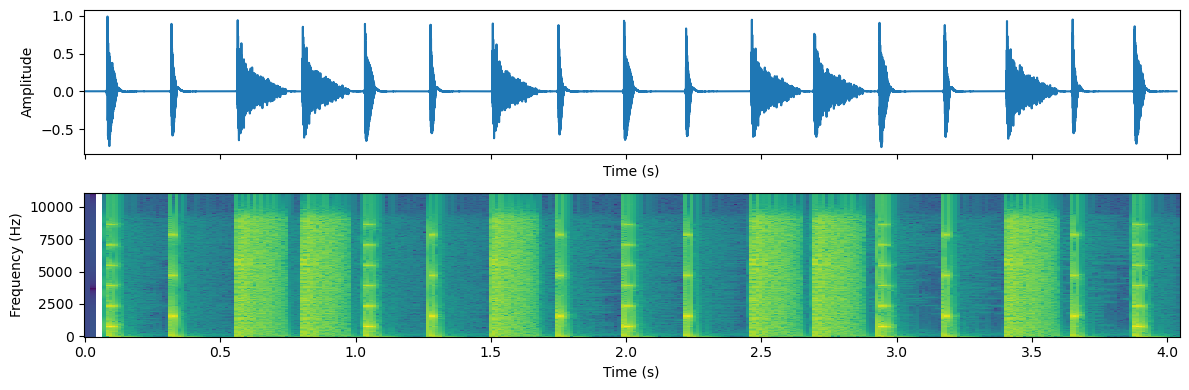

In [72]:
window = 'boxcar'
spectrogram(window)

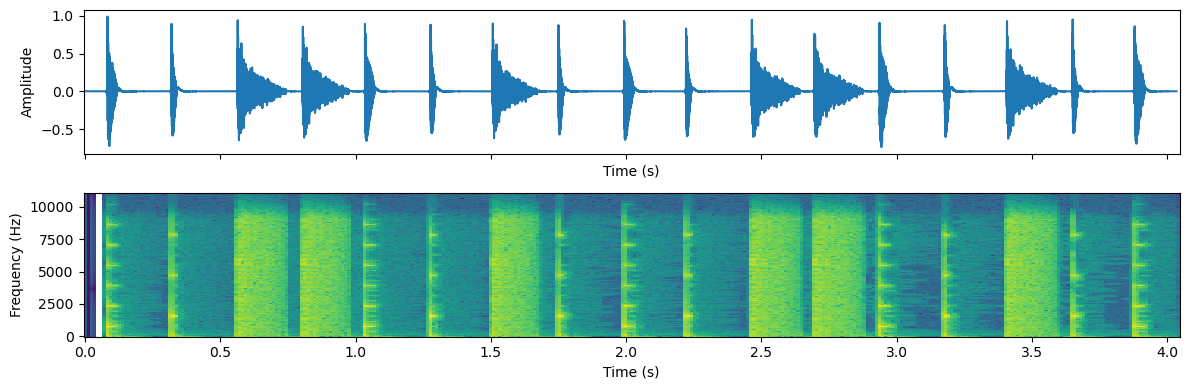

In [73]:
window = 'bartlett'
spectrogram(window)

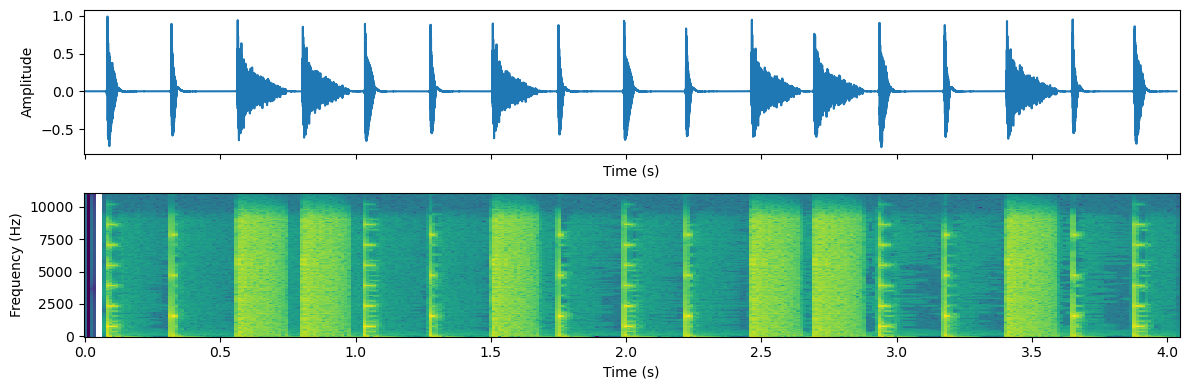

In [74]:
window = 'hann'
spectrogram(window)

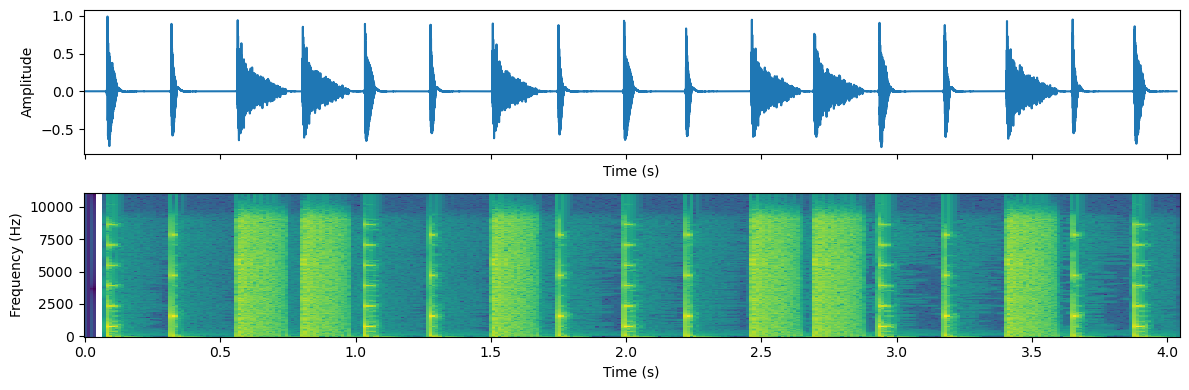

In [75]:
window = 'hamming'
spectrogram(window)